# Visualizing relationship growth

In Neighborly, relationships develop as a function of time, the current relationship state, and characters disposition toward each other. 

This notebook visualizes the change in relationship values over time.

In [1]:
%matplotlib inline
import time
from typing import Any, Dict

import matplotlib.pyplot as plt

from neighborly import Component, ISystem, Neighborly, NeighborlyConfig, SimDateTime
from neighborly.components import GameCharacter
from neighborly.core.status import StatusComponent, StatusManager
from neighborly.data_collection import DataCollector
from neighborly.core.relationship import (
    Friendship,
    Romance,
    RelationshipManager,
    InteractionScore,
)
from neighborly.utils.common import (
    add_character_to_settlement,
    spawn_character,
    spawn_settlement,
)
from neighborly.decorators import component, system

In [2]:
sim = Neighborly(
    NeighborlyConfig.parse_obj(
        {
            "relationship_schema": {
                "components": {
                    "Friendship": {
                        "min_value": -100,
                        "max_value": 100,
                    },
                    "Romance": {
                        "min_value": -100,
                        "max_value": 100,
                    },
                    "InteractionScore": {
                        "min_value": -5,
                        "max_value": 5,
                    },
                }
            },
            "plugins": [
                "neighborly.plugins.defaults.names",
                "neighborly.plugins.defaults.characters",
                "neighborly.plugins.defaults.businesses",
                "neighborly.plugins.defaults.residences",
                "neighborly.plugins.defaults.life_events",
                "neighborly.plugins.defaults.ai",
                "neighborly.plugins.defaults.social_rules",
                "neighborly.plugins.defaults.location_bias_rules",
            ],
        }
    )
)

In [3]:
@component(sim)
class Robot(Component):
    """Tags a character as a Robot"""

    def to_dict(self) -> Dict[str, Any]:
        return {}


@component(sim)
class OwesDebt(StatusComponent):
    """Marks a character as owing money to another character"""

    def __init__(self, amount: int) -> None:
        super().__init__()
        self.amount: int = amount

    def to_dict(self) -> Dict[str, Any]:
        return {"amount": self.amount}


@system(sim)
class RelationshipReporter(ISystem):
    sys_group = "data-collection"

    def process(self, *args: Any, **kwargs: Any) -> None:
        timestamp = self.world.get_resource(SimDateTime).to_iso_str()
        data_collector = self.world.get_resource(DataCollector)
        for guid, (game_character, relationship_manager) in self.world.get_components(
            (GameCharacter, RelationshipManager)
        ):
            if (
                game_character.first_name == "Delores"
                and game_character.last_name == "Abernathy"
            ):
                for target_id, rel_id in relationship_manager.relationships.items():
                    relationship = self.world.get_gameobject(rel_id)
                    data_collector.add_table_row(
                        "relationships",
                        {
                            "timestamp": timestamp,
                            "owner": guid,
                            "target": target_id,
                            "friendship": relationship.get_component(
                                Friendship
                            ).get_value(),
                            "romance": relationship.get_component(Romance).get_value(),
                            "interaction_score": relationship.get_component(
                                InteractionScore
                            ).get_value(),
                            "statuses": str(relationship.get_component(StatusManager)),
                        },
                    )

In [4]:
sim.world.get_resource(DataCollector).create_new_table(
    "relationships",
    (
        "timestamp",
        "owner",
        "target",
        "friendship",
        "romance",
        "interaction_score",
        "statuses",
    ),
)

west_world = spawn_settlement(sim.world, "West World")

delores = spawn_character(
    sim.world,
    "character::default::female",
    first_name="Delores",
    last_name="Abernathy",
    age=32,
)

delores.add_component(Robot())

add_character_to_settlement(delores, west_world)

charlotte = spawn_character(
    sim.world,
    "character::default::female",
    first_name="Charlotte",
    last_name="Hale",
    age=40,
)

add_character_to_settlement(charlotte, west_world)

william = spawn_character(
    sim.world,
    "character::default::male",
    first_name="William",
    last_name="ManInBlack",
    age=68,
)

add_character_to_settlement(william, west_world)

st = time.time()
sim.run_for(25)
elapsed_time = time.time() - st

print(f"World Date: {str(sim.world.get_resource(SimDateTime))}")
print("Execution time: ", elapsed_time, "seconds")

rel_data = sim.world.get_resource(DataCollector).get_table_dataframe("relationships")

NewSettlementEvent [@ 0001-01-01T00:00:00] (Settlement: West World)
NewCharacterEvent [@ 0001-01-01T00:00:00] (Character: Delores Abernathy(2))
NewCharacterEvent [@ 0001-01-01T00:00:00] (Character: Charlotte Hale(3))
NewCharacterEvent [@ 0001-01-01T00:00:00] (Character: William ManInBlack(4))
NewResidenceEvent [@ 0001-01-01T00:00:00] (Residence: residence::default::house(5))
NewCharacterEvent [@ 0001-01-01T00:00:00] (Character: Ariel Crewse(6))
NewCharacterEvent [@ 0001-01-01T00:00:00] (Character: Maurice Crewse(7))
NewCharacterEvent [@ 0001-01-01T00:00:00] (Character: Evan Crewse(10))
NewCharacterEvent [@ 0001-01-01T00:00:00] (Character: Dorrie Crewse(16))
NewCharacterEvent [@ 0001-01-01T00:00:00] (Character: Lionello Crewse(24))
NewResidenceEvent [@ 0001-01-01T00:00:00] (Residence: residence::default::house(34))
NewCharacterEvent [@ 0001-01-01T00:00:00] (Character: Benedetta Javens(35))
NewResidenceEvent [@ 0001-01-01T00:00:00] (Residence: residence::default::house(36))
NewCharacterE

NewResidenceEvent [@ 0002-01-01T00:00:00] (Residence: residence::default::house(470))
NewCharacterEvent [@ 0002-01-01T00:00:00] (Character: Seth Brookes(471))
NewCharacterEvent [@ 0002-01-01T00:00:00] (Character: Nevins Brookes(472))
NewCharacterEvent [@ 0002-01-01T00:00:00] (Character: Cinnamon Brookes(475))
BecomeAdolescentEvent [@ 0002-01-01T00:00:00] (Character: Evan Crewse(10))
JoinSettlementEvent [@ 0002-01-01T00:00:00] (Settlement: West World), (Character: Seth Brookes(471))
JoinSettlementEvent [@ 0002-01-01T00:00:00] (Settlement: West World), (Character: Nevins Brookes(472))
JoinSettlementEvent [@ 0002-01-01T00:00:00] (Settlement: West World), (Character: Cinnamon Brookes(475))
MoveResidenceEvent [@ 0002-01-01T00:00:00] (Residence: residence::default::house(470)), (Character: Seth Brookes(471)), (Character: Nevins Brookes(472)), (Character: Cinnamon Brookes(475))
BecomeAdultEvent [@ 0002-02-01T00:00:00] (Character: Aubrey Burnap(43))
StartJobEvent [@ 0002-02-01T00:00:00] (Chara

GoOutOfBusiness [@ 0005-04-01T00:00:00] (Business: Library(1000))
EndJobEvent [@ 0005-04-01T00:00:00] (Character: Sivert Shilling(708)), (Business: Library(1000)), occupation=Librarian, reason=BusinessClosedEvent
BusinessClosedEvent [@ 0005-04-01T00:00:00] (Business: Library(1000))
StartJobEvent [@ 0005-04-01T00:00:00] (Character: Sivert Shilling(708)), (Business: Library(999)), occupation=Librarian
GoOutOfBusiness [@ 0005-05-01T00:00:00] (Business: Library(999))
EndJobEvent [@ 0005-05-01T00:00:00] (Character: Sivert Shilling(708)), (Business: Library(999)), occupation=Librarian, reason=BusinessClosedEvent
EndJobEvent [@ 0005-05-01T00:00:00] (Character: Rene Strode(656)), (Business: Library(999)), occupation=Librarian, reason=BusinessClosedEvent
BusinessClosedEvent [@ 0005-05-01T00:00:00] (Business: Library(999))
StartJobEvent [@ 0005-05-01T00:00:00] (Character: Rene Strode(656)), (Business: Library(1001)), occupation=Librarian
StartJobEvent [@ 0005-05-01T00:00:00] (Character: Sivert S

NewBusinessEvent [@ 0006-10-01T00:00:00] (Business: Cafe(1008))
StartBusinessEvent [@ 0006-10-01T00:00:00] (Character: Aubrey Burnap(43)), (Business: Cafe(1008)), occupation=Owner
NewBusinessEvent [@ 0006-10-01T00:00:00] (Business: Cafe(1009))
StartBusinessEvent [@ 0006-10-01T00:00:00] (Character: Sivert Shilling(708)), (Business: Cafe(1009)), occupation=Owner
NewBusinessEvent [@ 0006-10-01T00:00:00] (Business: Cafe(1010))
StartBusinessEvent [@ 0006-10-01T00:00:00] (Character: Seth Brookes(471)), (Business: Cafe(1010)), occupation=Owner
StartJobEvent [@ 0006-10-01T00:00:00] (Character: Aubrey Burnap(43)), (Business: Cafe(1008)), occupation=Owner
StartJobEvent [@ 0006-10-01T00:00:00] (Character: Sivert Shilling(708)), (Business: Cafe(1009)), occupation=Owner
StartJobEvent [@ 0006-10-01T00:00:00] (Character: Seth Brookes(471)), (Business: Cafe(1010)), occupation=Owner
GoOutOfBusiness [@ 0007-01-01T00:00:00] (Business: Library(1007))
EndJobEvent [@ 0007-01-01T00:00:00] (Character: Delores

BecomeAdolescentEvent [@ 0008-07-01T00:00:00] (Character: Moll Turnage(192))
BecomeAdolescentEvent [@ 0009-01-01T00:00:00] (Character: Sawyer Northington(38))
BecomeAdolescentEvent [@ 0009-01-01T00:00:00] (Character: Rob Shilling(718))
BecomeAdolescentEvent [@ 0010-01-01T00:00:00] (Character: Quentin Shilling(726))
BecomeAdolescentEvent [@ 0010-01-01T00:00:00] (Character: Cinnamon Brookes(475))
BecomeAdultEvent [@ 0010-02-01T00:00:00] (Character: Ramsay Northington(37))
BecomeAdolescentEvent [@ 0010-07-01T00:00:00] (Character: Sinclare Weatherley(183))
GoOutOfBusiness [@ 0010-10-01T00:00:00] (Business: Library(1005))
EndJobEvent [@ 0010-10-01T00:00:00] (Character: Benedetta Javens(35)), (Business: Library(1005)), occupation=Librarian, reason=BusinessClosedEvent
EndJobEvent [@ 0010-10-01T00:00:00] (Character: Nevins Brookes(472)), (Business: Library(1005)), occupation=Librarian, reason=BusinessClosedEvent
EndJobEvent [@ 0010-10-01T00:00:00] (Character: Rene Strode(656)), (Business: Libr

BecomeAdultEvent [@ 0012-08-01T00:00:00] (Character: Allene Weatherley(182))
BecomeYoungAdultEvent [@ 0013-01-01T00:00:00] (Character: Warde Son(53))
GoOutOfBusiness [@ 0013-02-01T00:00:00] (Business: Library(1006))
EndJobEvent [@ 0013-02-01T00:00:00] (Character: Tatum Turnage(188)), (Business: Library(1006)), occupation=Librarian, reason=BusinessClosedEvent
EndJobEvent [@ 0013-02-01T00:00:00] (Character: Milan Turnage(189)), (Business: Library(1006)), occupation=Librarian, reason=BusinessClosedEvent
EndJobEvent [@ 0013-02-01T00:00:00] (Character: Jude Son(49)), (Business: Library(1006)), occupation=Librarian, reason=BusinessClosedEvent
BusinessClosedEvent [@ 0013-02-01T00:00:00] (Business: Library(1006))
BecomeAdultEvent [@ 0013-02-01T00:00:00] (Character: Sivert Shilling(708))
StartJobEvent [@ 0013-02-01T00:00:00] (Character: Milan Turnage(189)), (Business: Library(1021)), occupation=Librarian
StartJobEvent [@ 0013-02-01T00:00:00] (Character: Jude Son(49)), (Business: Cafe(1022)), oc

BecomeYoungAdultEvent [@ 0016-01-01T00:00:00] (Character: Dorrie Crewse(16))
BecomeYoungAdultEvent [@ 0016-01-01T00:00:00] (Character: Finley Burnap(44))
GoOutOfBusiness [@ 0016-02-01T00:00:00] (Business: Library(1031))
BusinessClosedEvent [@ 0016-02-01T00:00:00] (Business: Library(1031))
StartJobEvent [@ 0016-02-01T00:00:00] (Character: Finley Burnap(44)), (Business: Cafe(1025)), occupation=Barista
StartJobEvent [@ 0016-02-01T00:00:00] (Character: Dorrie Crewse(16)), (Business: Cafe(1027)), occupation=Barista
GoOutOfBusiness [@ 0016-05-01T00:00:00] (Business: Cafe(1027))
EndJobEvent [@ 0016-05-01T00:00:00] (Character: Allene Weatherley(182)), (Business: Cafe(1027)), occupation=Barista, reason=BusinessClosedEvent
EndJobEvent [@ 0016-05-01T00:00:00] (Character: Dorrie Crewse(16)), (Business: Cafe(1027)), occupation=Barista, reason=BusinessClosedEvent
EndJobEvent [@ 0016-05-01T00:00:00] (Character: Milan Turnage(189)), (Business: Cafe(1027)), occupation=Owner, reason=BusinessClosedEvent


GoOutOfBusiness [@ 0019-04-01T00:00:00] (Business: Cafe(1013))
EndJobEvent [@ 0019-04-01T00:00:00] (Character: Ariel Crewse(6)), (Business: Cafe(1013)), occupation=Barista, reason=BusinessClosedEvent
EndJobEvent [@ 0019-04-01T00:00:00] (Character: Maurice Crewse(7)), (Business: Cafe(1013)), occupation=Barista, reason=BusinessClosedEvent
EndJobEvent [@ 0019-04-01T00:00:00] (Character: Aubrey Burnap(43)), (Business: Cafe(1013)), occupation=Owner, reason=BusinessClosedEvent
BusinessClosedEvent [@ 0019-04-01T00:00:00] (Business: Cafe(1013))
StartJobEvent [@ 0019-04-01T00:00:00] (Character: Aubrey Burnap(43)), (Business: Library(1036)), occupation=Librarian
StartJobEvent [@ 0019-04-01T00:00:00] (Character: Ariel Crewse(6)), (Business: Library(1036)), occupation=Librarian
NewBusinessEvent [@ 0019-05-01T00:00:00] (Business: Library(1037))
StartBusinessEvent [@ 0019-05-01T00:00:00] (Character: Maurice Crewse(7)), (Business: Library(1037)), occupation=Librarian
StartJobEvent [@ 0019-05-01T00:00

NewResidenceEvent [@ 0025-07-01T00:00:00] (Residence: residence::default::house(1044))
NewCharacterEvent [@ 0025-07-01T00:00:00] (Character: Santana Mountford(1045))
NewCharacterEvent [@ 0025-07-01T00:00:00] (Character: Dakota Mountford(1046))
NewCharacterEvent [@ 0025-07-01T00:00:00] (Character: Skylar Mountford(1049))
NewCharacterEvent [@ 0025-07-01T00:00:00] (Character: Ruperta Mountford(1055))
GoOutOfBusiness [@ 0025-07-01T00:00:00] (Business: Library(1036))
EndJobEvent [@ 0025-07-01T00:00:00] (Character: Aubrey Burnap(43)), (Business: Library(1036)), occupation=Librarian, reason=BusinessClosedEvent
EndJobEvent [@ 0025-07-01T00:00:00] (Character: Ariel Crewse(6)), (Business: Library(1036)), occupation=Librarian, reason=BusinessClosedEvent
EndJobEvent [@ 0025-07-01T00:00:00] (Character: Sivert Shilling(708)), (Business: Library(1036)), occupation=Librarian, reason=BusinessClosedEvent
BusinessClosedEvent [@ 0025-07-01T00:00:00] (Business: Library(1036))
StartJobEvent [@ 0025-07-01T00

In [5]:
relationships_df = sim.world.get_resource(DataCollector).get_table_dataframe(
    "relationships"
)

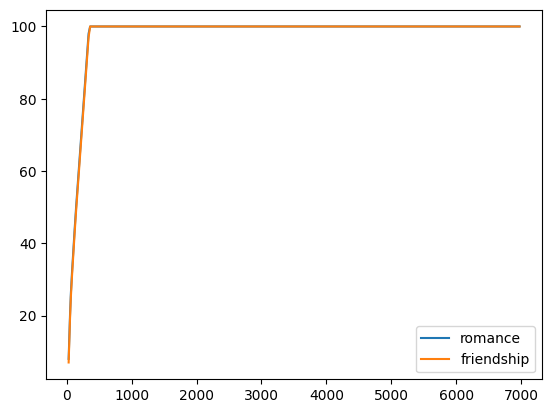

In [6]:
df = relationships_df.loc[relationships_df.target == 3].iloc[:240]
df.plot(y=["romance", "friendship"])
plt.show()